In [1]:
#Importing needed packages
import warnings
warnings.filterwarnings('ignore')


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Looking at the dataset
df = pd.read_csv("Leads.csv")

In [3]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
#Looking at the number of rows and columns
df.shape

(9240, 37)

In [5]:
#Looking at the numerical summary
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [7]:
#Looking at the number of missing values in each columns
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [8]:
#Here we dont need Prospect id and Lead Number 
df.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [9]:
#Converting 'Select' values to NaN.
df = df.replace('Select', np.nan)

In [10]:
#Removing all sales team generated columns 
df.drop(['Tags', 'Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Quality','Last Activity','Last Notable Activity'], 1, inplace = True)

In [11]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [12]:
#drop all the columns which is having more than 45% missing data
cols=df.columns

for i in cols:
    if((100*(df[i].isnull().sum()/len(df.index))) >= 45):
        df.drop(i, 1, inplace = True)

In [13]:
df.shape

(9240, 25)

In [14]:
df.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Country                                          2461
Specialization                                   3380
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement                               0
Through Recommendations     

In [15]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

## Analysing missing data in each columns

In [16]:
#analysisng each column having missing values starting from highest missing percentage
df['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [17]:
#Replacing NaN with Mumbai as it is the most repeated
df['City'] = df['City'].replace(np.NaN,'Mumbai')

In [18]:
#verifying after replacing
df['City'].value_counts(dropna=False)

Mumbai                         6891
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [19]:
#Analysing Specialization column
df['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [20]:
#Here we observe that the valid Specialization are alomost neck to neck. So replacing NaNs with new specialization as "Others"
df['Specialization'] = df['Specialization'].replace(np.NaN,'Not Mentioned')

In [21]:
#verifying after replacing
df['Specialization'].value_counts(dropna=False)

Not Mentioned                        3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [22]:
#combining Management Specializations because they show similar trends

df['Specialization'] = df['Specialization'].replace(['Finance Management','Human Resource Management','Marketing Management','Operations Management','IT Projects Management','Supply Chain Management','Healthcare Management','Hospitality Management','Retail Management'] ,'Management_Specializations') 

In [23]:
#Analysing Country column
df['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
Canada                     4
Nigeria                    4
Germany                    4
Kuwait                     4
South Africa               4
Sweden                     3
Belgium                    2
Philippines                2
Italy                      2
Bangladesh                 2
China                      2
Ghana                      2
Netherlands                2
Asia/Pacific Region        2
Uganda                     2
Vietnam                    1
Russia                     1
Tanzania                   1
Switzerland                1
Malaysia                   1
Kenya         

In [24]:
#Replacing NaN with India as it is the most repeated
df['Country'] = df['Country'].replace(np.NaN,'India')

In [25]:
#verifying after replacing
df['Country'].value_counts(dropna=False)

India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
Nigeria                    4
Germany                    4
South Africa               4
Canada                     4
Sweden                     3
Italy                      2
Ghana                      2
China                      2
Belgium                    2
Uganda                     2
Philippines                2
Asia/Pacific Region        2
Netherlands                2
Bangladesh                 2
Denmark                    1
Liberia                    1
Kenya                      1
Malaysia                   1
Russia                     1
Sri Lanka                  1
Tanzania      

In [26]:
#Analysing What matters most to you in choosing a course column
df['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [27]:
#Since Better Career Prospects is most occuring one. Reolacing it with NaNs
df['What matters most to you in choosing a course'] = df['What matters most to you in choosing a course'].replace(np.NaN,'Better Career Prospects')

In [28]:
#verifying after replacing
df['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [29]:
 #Analysing What is your current occupation column
df['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [30]:
#Since Unemployed is most occuring one. Reolacing it with NaNs
df['What is your current occupation'] = df['What is your current occupation'].replace(np.NaN,'Unemployed')

In [31]:
#verifying after replacing
df['What is your current occupation'].value_counts(dropna=False)

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [32]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement                            0.00
Through Recommendations     

In [33]:
#Here we observed that TotalVisits and Page Views Per Visit has 1.48% missing values. So we can drop this 
df = df.dropna()

In [34]:
#Verifing again
round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                       

In [35]:
df.shape

(9074, 25)

## We see that all the missing values tretments is done

# Performing EDA and outlier treatments

In [36]:
#Categotrical Analysis of each colums
df["Lead Origin"].value_counts()

Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64

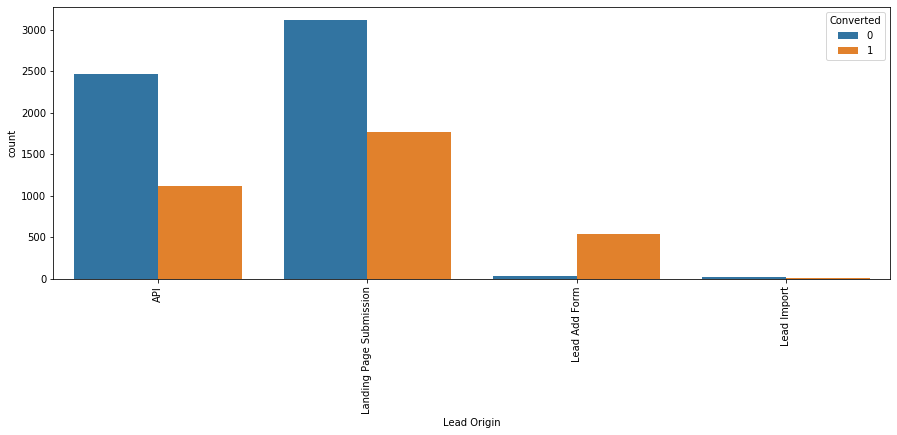

In [37]:
plt.figure(figsize=(15,5))
s1=sns.countplot(df["Lead Origin"],hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [38]:
df["Lead Source"].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Social Media            2
Press_Release           2
Live Chat               2
blog                    1
WeLearn                 1
Pay per Click Ads       1
youtubechannel          1
NC_EDM                  1
welearnblog_Home        1
testone                 1
Name: Lead Source, dtype: int64

In [39]:
#Combining Google with google
df["Lead Source"]=df["Lead Source"].replace('google','Google')

In [40]:
#since so many values has single digit occurence. We can create a new category as other and combine them inorder to reduce the number of columns
df["Lead Source"]=df["Lead Source"].replace(['bing','Click2call','Press_Release','Live Chat','Social Media','Pay per Click Ads','blog','testone','WeLearn','welearnblog_Home','NC_EDM','youtubechannel'],'Other')

In [41]:
df["Lead Source"].value_counts()

Google              2873
Direct Traffic      2543
Olark Chat          1753
Organic Search      1154
Reference            443
Welingak Website     129
Referral Sites       125
Facebook              31
Other                 23
Name: Lead Source, dtype: int64

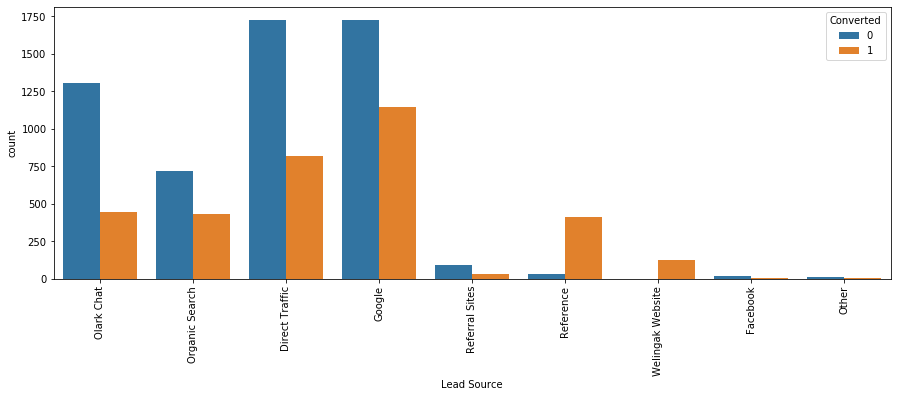

In [42]:
plt.figure(figsize=(15,5))
s1=sns.countplot(df["Lead Source"],hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [43]:
df["Do Not Email"].value_counts()

No     8358
Yes     716
Name: Do Not Email, dtype: int64

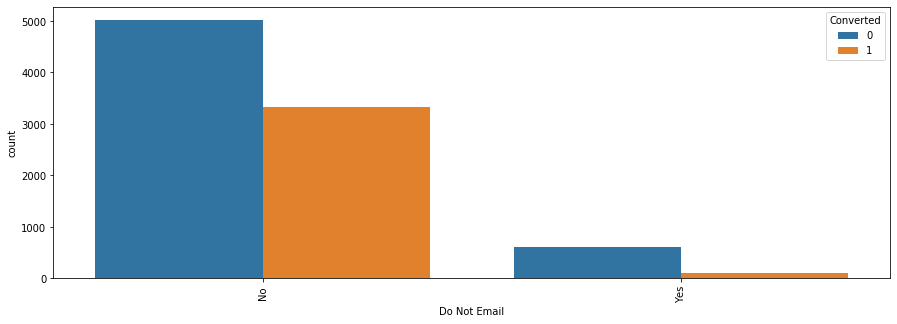

In [44]:
plt.figure(figsize=(15,5))
s1=sns.countplot(df["Do Not Email"],hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [45]:
df["Do Not Call"].value_counts()

No     9072
Yes       2
Name: Do Not Call, dtype: int64

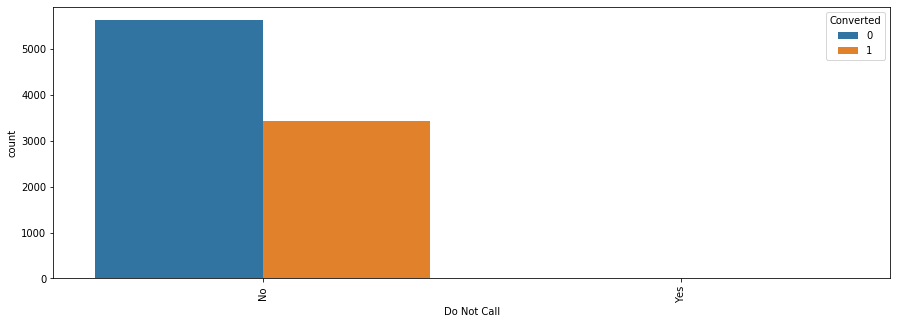

In [46]:
plt.figure(figsize=(15,5))
s1=sns.countplot(df["Do Not Call"],hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [47]:
df["Country"].value_counts()


India                   8787
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
Nigeria                    4
Germany                    4
South Africa               4
Canada                     4
Sweden                     3
Italy                      2
Ghana                      2
China                      2
Belgium                    2
Uganda                     2
Philippines                2
Asia/Pacific Region        2
Netherlands                2
Bangladesh                 2
Denmark                    1
Liberia                    1
Kenya                      1
Malaysia                   1
Russia                     1
Sri Lanka                  1
Tanzania      

In [48]:
#We will convert all the single digit occurence of countries into other countries
df["Country"]=df["Country"].replace(['Hong Kong','Bahrain','Oman','France','unknown','Germany','Nigeria','Canada','South Africa','Kuwait','Sweden','Belgium','Uganda','Ghana','Bangladesh','China','Italy','Philippines','Asia/Pacific Region','Netherlands','Denmark','Vietnam','Indonesia','Sri Lanka','Kenya','Tanzania','Switzerland','Liberia','Russia','Malaysia'],'Other_Countries')

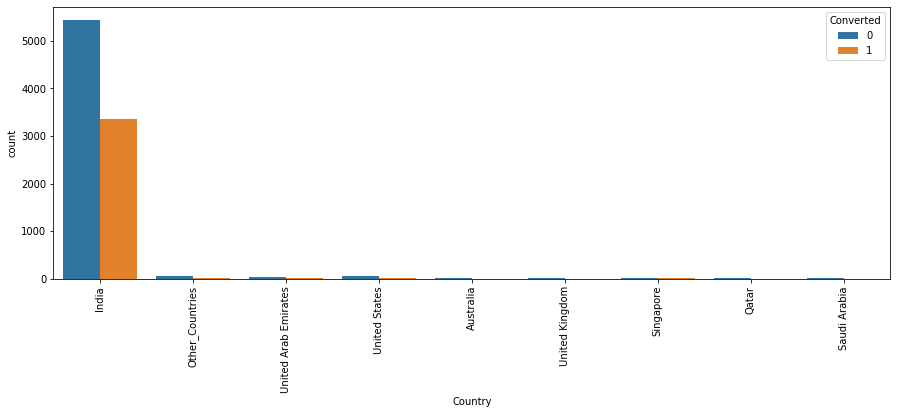

In [49]:
plt.figure(figsize=(15,5))
s1=sns.countplot(df["Country"],hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

### We see that the users are from India only than other countries

In [50]:
df["Specialization"].value_counts()

Management_Specializations           4197
Not Mentioned                        3282
Business Administration               399
Banking, Investment And Insurance     335
Media and Advertising                 202
Travel and Tourism                    202
International Business                176
E-COMMERCE                            111
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

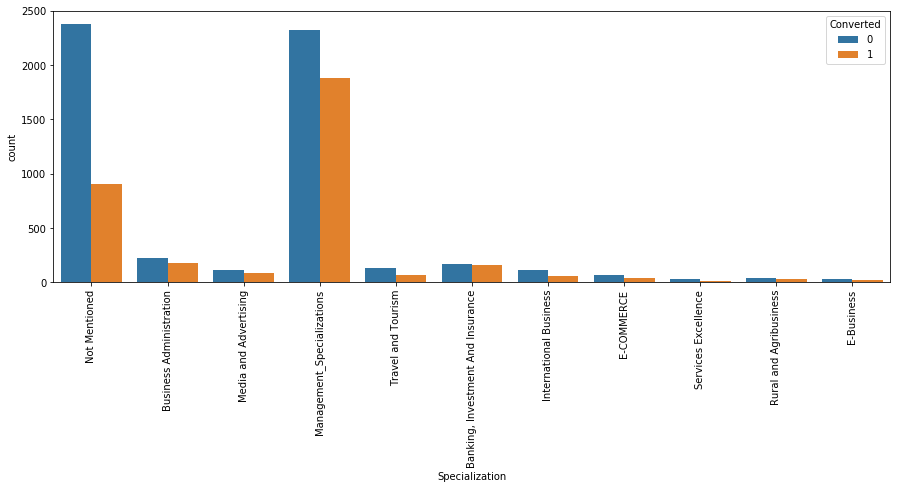

In [51]:
plt.figure(figsize=(15,5))
s1=sns.countplot(df["Specialization"],hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

### Converted rates can be seen mostly for Management specializations. 

In [52]:
df["What is your current occupation"].value_counts()

Unemployed              8159
Working Professional     677
Student                  206
Other                     15
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64

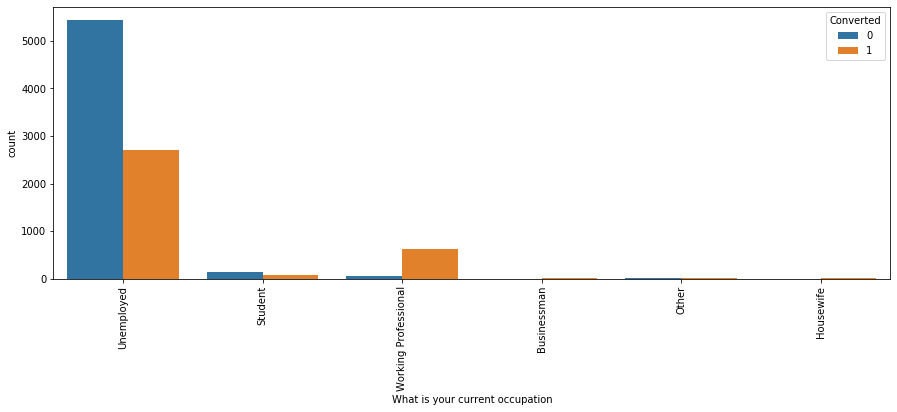

In [53]:
plt.figure(figsize=(15,5))
s1=sns.countplot(df["What is your current occupation"],hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

### Conversion rate is more for Working Professionals

In [54]:
df["What matters most to you in choosing a course"].value_counts()

Better Career Prospects      9072
Other                           1
Flexibility & Convenience       1
Name: What matters most to you in choosing a course, dtype: int64

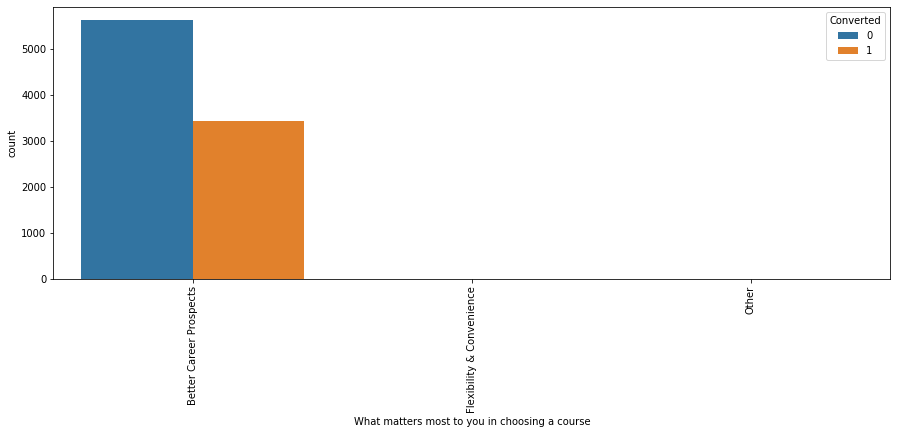

In [55]:
plt.figure(figsize=(15,5))
s1=sns.countplot(df["What matters most to you in choosing a course"],hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [56]:
df["Search"].value_counts()

No     9060
Yes      14
Name: Search, dtype: int64

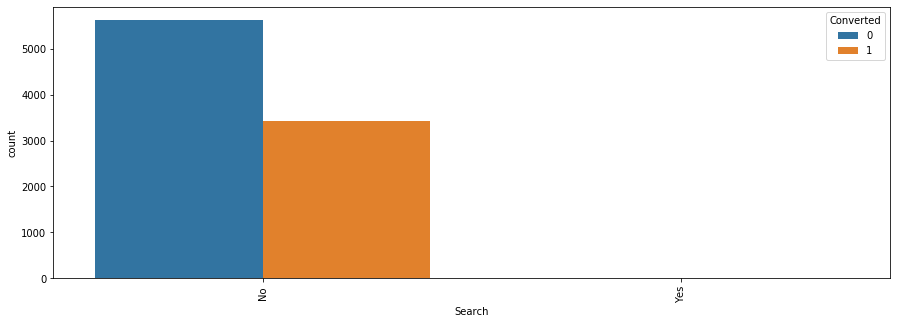

In [57]:
plt.figure(figsize=(15,5))
s1=sns.countplot(df["Search"],hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [58]:
df["Magazine"].value_counts()

No    9074
Name: Magazine, dtype: int64

In [59]:
df["Newspaper Article"].value_counts()

No     9072
Yes       2
Name: Newspaper Article, dtype: int64

In [60]:
df["X Education Forums"].value_counts()

No     9073
Yes       1
Name: X Education Forums, dtype: int64

In [61]:
df["Newspaper"].value_counts()

No     9073
Yes       1
Name: Newspaper, dtype: int64

In [62]:
df["Digital Advertisement"].value_counts()

No     9070
Yes       4
Name: Digital Advertisement, dtype: int64

In [63]:
df["Through Recommendations"].value_counts()

No     9067
Yes       7
Name: Through Recommendations, dtype: int64

In [64]:
df["Receive More Updates About Our Courses"].value_counts()

No    9074
Name: Receive More Updates About Our Courses, dtype: int64

In [65]:
df["Update me on Supply Chain Content"].value_counts()

No    9074
Name: Update me on Supply Chain Content, dtype: int64

In [66]:
df["Get updates on DM Content"].value_counts()

No    9074
Name: Get updates on DM Content, dtype: int64

In [67]:
#Since Some columns have only 1 unique value. We can drop such columns
colsTodrop=['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque']

In [68]:
df["City"].value_counts()

Mumbai                         6752
Thane & Outskirts               745
Other Cities                    680
Other Cities of Maharashtra     446
Other Metro Cities              377
Tier II Cities                   74
Name: City, dtype: int64

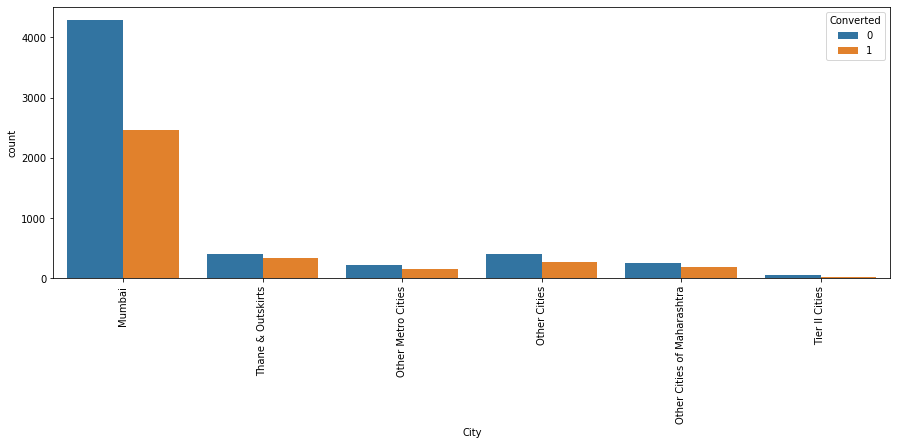

In [69]:
plt.figure(figsize=(15,5))
s1=sns.countplot(df["City"],hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [70]:
df["I agree to pay the amount through cheque"].value_counts()

No    9074
Name: I agree to pay the amount through cheque, dtype: int64

In [71]:
df["A free copy of Mastering The Interview"].value_counts()

No     6186
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

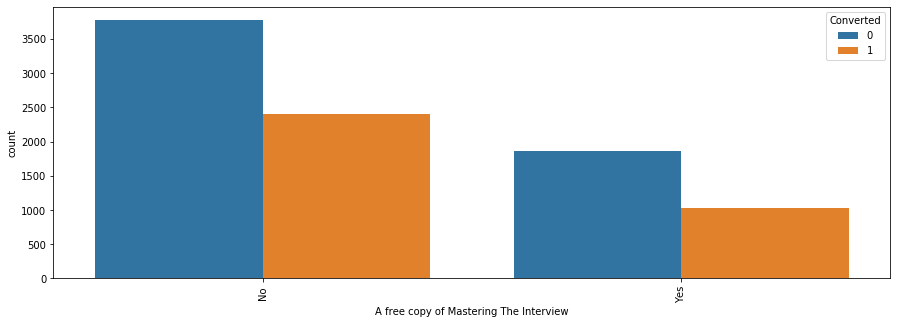

In [72]:
plt.figure(figsize=(15,5))
s1=sns.countplot(df["A free copy of Mastering The Interview"],hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [73]:
#Outlier analysis of Numerical Columns
# Checking outliers at 25%,50%,75%,90%,95% and above
df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000
mean,0.378554,3.456028,482.887481,2.370151
std,0.485053,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,11.000000,1.000000
50%,0.000000,3.000000,246.000000,2.000000
75%,1.000000,5.000000,922.750000,3.200000
90%,1.000000,7.000000,1373.000000,5.000000
95%,1.000000,10.000000,1557.000000,6.000000
99%,1.000000,17.000000,1839.000000,9.000000


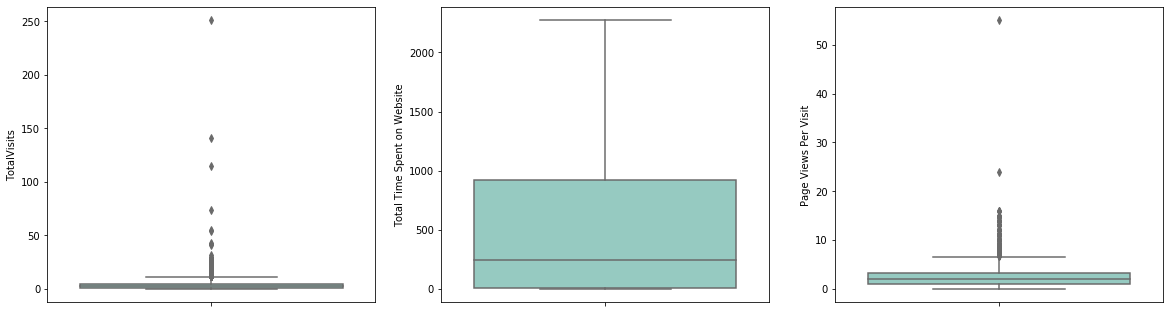

In [74]:
plt.figure(figsize=(20, 25))
plt.subplot(4,3,1)
sns.boxplot(y = 'TotalVisits', palette='Set3', data = df)
plt.subplot(4,3,2)
sns.boxplot(y = 'Total Time Spent on Website', palette='Set3', data = df)
plt.subplot(4,3,3)
sns.boxplot(y = 'Page Views Per Visit', palette='Set3', data = df)
plt.show()

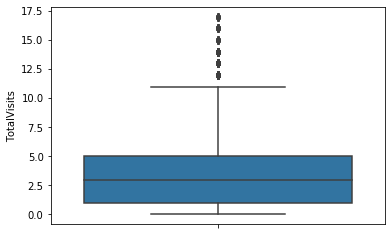

In [75]:
#Outlier Treatment: Remove top & bottom 1% of the Column Outlier values

Q3 = df.TotalVisits.quantile(0.99)
df = df[(df.TotalVisits <= Q3)]
Q1 = df.TotalVisits.quantile(0.01)
df = df[(df.TotalVisits >= Q1)]
sns.boxplot(y=df['TotalVisits'])
plt.show()

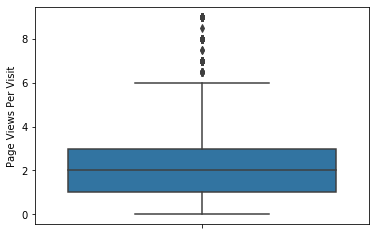

In [76]:
#Outlier Treatment: Remove top & bottom 1% 

Q3 = df['Page Views Per Visit'].quantile(0.99)
df = df[df['Page Views Per Visit'] <= Q3]
Q1 = df['Page Views Per Visit'].quantile(0.01)
df = df[df['Page Views Per Visit'] >= Q1]
sns.boxplot(y=df['Page Views Per Visit'])
plt.show()

In [77]:
# Determine the percentage of data retained

num_data = round(100*(len(df)/9240),2)
print(num_data)

96.58


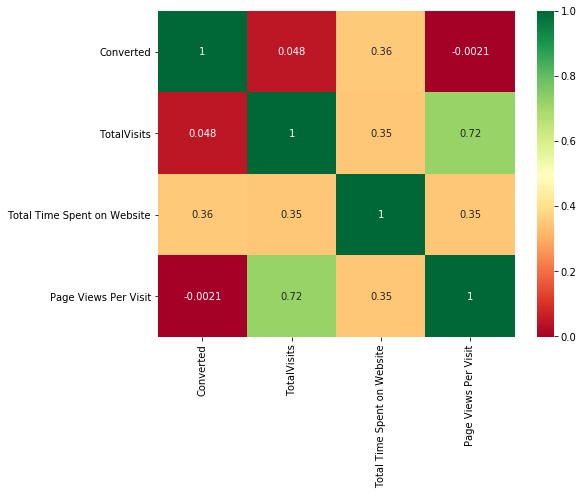

In [78]:
#Finding co-relation between the attribues
plt.figure(figsize = (8,6))
ax=sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)
plt.show()

In [79]:
#getting a list of categorical columns

cat_cols= df.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Country',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview'],
      dtype='object')

In [80]:
# List of variables to map
#Here will map all the binary columns having more than 1 occuences
varlist =  ['Do Not Email', 'Do Not Call', 'Search', 'Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)

## Creating Dummy Variables

In [81]:
alls = pd.get_dummies(df[['Lead Origin','Lead Source','What is your current occupation','City','Specialization','What matters most to you in choosing a course']], drop_first=True)

In [82]:
alls.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,Lead Source_Referral Sites,...,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Not Mentioned,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [83]:
#Concatinating createed dataframes with Main Dataframe
df= pd.concat([df,alls],axis=1)

In [84]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,...,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Not Mentioned,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other
0,API,Olark Chat,0,0,0,0.0,0,0.0,India,Not Mentioned,...,0,0,0,0,1,0,0,0,0,0
1,API,Organic Search,0,0,0,5.0,674,2.5,India,Not Mentioned,...,0,0,0,0,1,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,India,Business Administration,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,India,Media and Advertising,...,0,0,0,1,0,0,0,0,0,0
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,India,Not Mentioned,...,0,0,0,0,1,0,0,0,0,0


In [85]:
# Dropping these categorical variables as dummy variables are created
df.drop(['Lead Origin','What is your current occupation','City','Specialization','Lead Source','Country','What matters most to you in choosing a course'],axis=1,inplace=True)

In [86]:
df.drop(colsTodrop,axis=1,inplace=True)

In [87]:
df.drop(['Newspaper Article','X Education Forums','Newspaper'],axis=1,inplace=True)

In [88]:
df.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,...,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Not Mentioned,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other
0,0,0,0,0.0,0,0.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,5.0,674,2.5,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,1,2.0,1532,2.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1.0,305,1.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,2.0,1428,1.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8924 entries, 0 to 9239
Data columns (total 43 columns):
Do Not Email                                                               8924 non-null int64
Do Not Call                                                                8924 non-null int64
Converted                                                                  8924 non-null int64
TotalVisits                                                                8924 non-null float64
Total Time Spent on Website                                                8924 non-null int64
Page Views Per Visit                                                       8924 non-null float64
Search                                                                     8924 non-null int64
Digital Advertisement                                                      8924 non-null int64
Through Recommendations                                                    8924 non-null int64
A free copy of Mastering The Inter

# Making Train and Test Sets

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
# Putting feature variable to X
X=df.drop('Converted', axis=1)

In [92]:
# Putting response variable to y
y = df['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [93]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

Feature Scalling

In [94]:
from sklearn.preprocessing import StandardScaler

In [95]:
scaler = StandardScaler()
X_train[['TotalVisits','Page Views Per Visit','Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits','Page Views Per Visit','Total Time Spent on Website']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,...,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Not Mentioned,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other
6676,0,0,-0.049636,1.395668,0.395289,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
6138,0,0,0.297929,0.609686,0.926758,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
8650,0,0,-0.049636,1.178657,0.395289,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3423,0,0,-1.092332,-0.878390,-1.199117,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6552,0,0,-1.092332,-0.878390,-1.199117,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [96]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6246 entries, 6676 to 5847
Data columns (total 42 columns):
Do Not Email                                                               6246 non-null int64
Do Not Call                                                                6246 non-null int64
TotalVisits                                                                6246 non-null float64
Total Time Spent on Website                                                6246 non-null float64
Page Views Per Visit                                                       6246 non-null float64
Search                                                                     6246 non-null int64
Digital Advertisement                                                      6246 non-null int64
Through Recommendations                                                    6246 non-null int64
A free copy of Mastering The Interview                                     6246 non-null int64
Lead Origin_Landing Page Subm

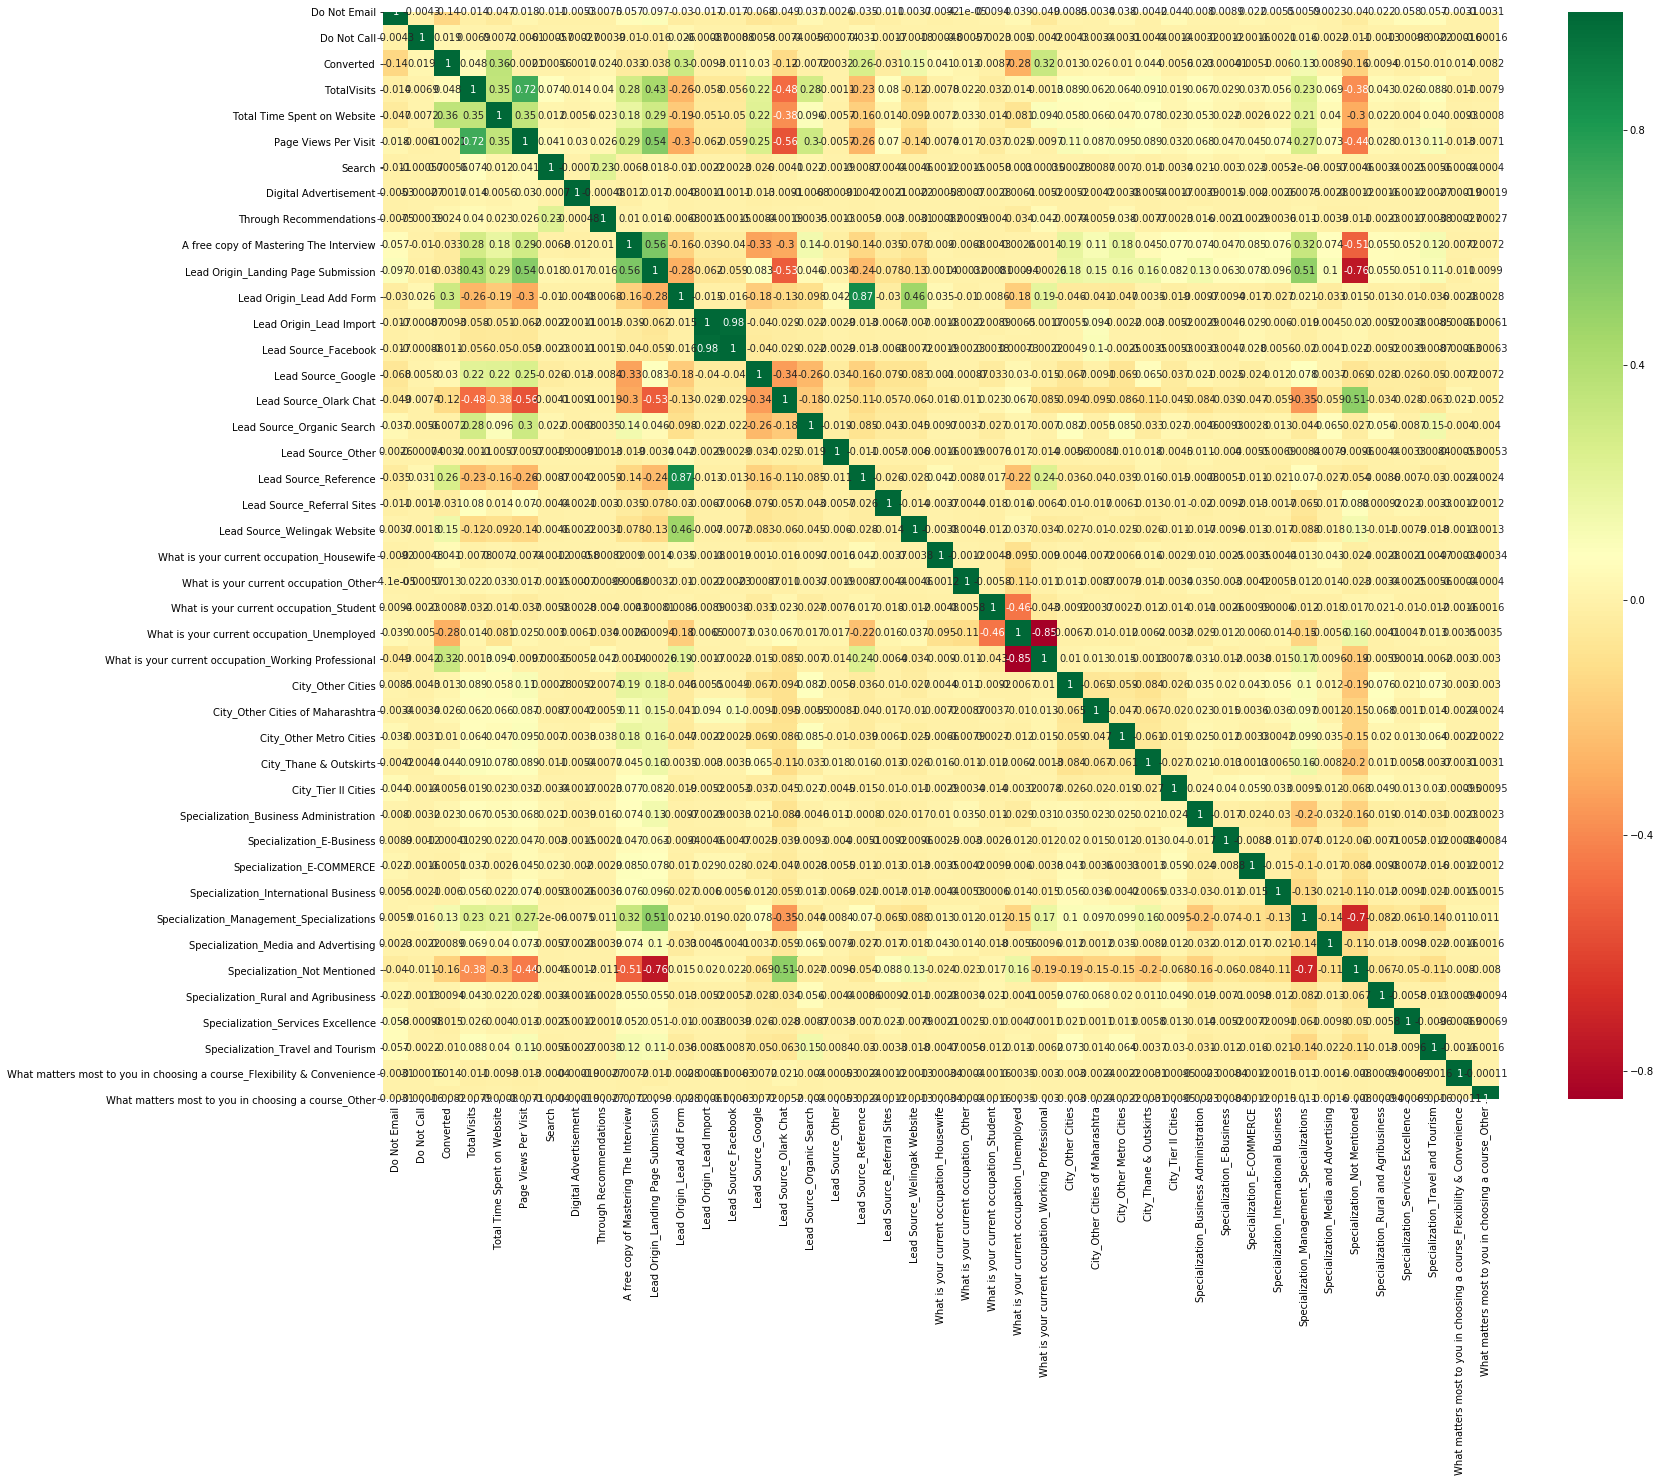

In [97]:
# Let's see the correlation matrix 
plt.figure(figsize = (25,20))        # Size of the figure
sns.heatmap(df.corr(),annot = True,cmap='RdYlGn')
plt.show()

In [98]:
### Checking the Converted Rate
conv = (sum(df['Converted'])/len(df['Converted'].index))*100
print('The conversion Rate is ',conv)

The conversion Rate is  37.75212909009413


# Model Building

In [99]:
import statsmodels.api as sm

In [100]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6203
Model Family:                Binomial   Df Model:                           42
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2890.5
Date:                Mon, 07 Dec 2020   Deviance:                       5781.0
Time:                        12:30:05   Pearson chi2:                 6.64e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                      -0.5815      2.267     -0.256      0.798      -5.025       3.862
Do Not Email                                                               -1.3994      0.170     -8.255      0.000      -1.732      -1.067
Do Not Call                                                                20.1882   3.37e+04      0.001      1.000    -6.6e+04     6.6e+04
TotalVisits                                                                 0.2182      0.047      4.627      0.000       0.126       0.311
Total Time Spent on Website                                                 1.0947      0.039     28.375      0.000       1.019       1.170
Page Views Per Visit                                                       -0.1379      0.054     -2.566      0.010      -0.243      -0.033
Search                                                                     -0.3018      0.939     -0.321      0.748      -2.143       1.539
Digital Advertisement                                                       0.2503      1.586      0.158      0.875      -2.857       3.358
Through Recommendations                                                     1.1628      1.509      0.771      0.441      -1.795       4.120
A free copy of Mastering The Interview                                     -0.2004      0.105     -1.900      0.057      -0.407       0.006
Lead Origin_Landing Page Submission                                        -0.7012      0.129     -5.429      0.000      -0.954      -0.448
Lead Origin_Lead Add Form                                                   2.0939      1.111      1.885      0.059      -0.083       4.271
Lead Origin_Lead Import                                                    21.3578   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Facebook                                                      -20.4629   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Lead Source_Google                                                          0.2304      0.111      2.071      0.038       0.012       0.448
Lead Source_Olark Chat                                                      1.0571      0.153      6.920      0.000       0.758       1.357
Lead Source_Organic Search                                                  0.2469      0.127      1.943      0.052      -0.002       0.496
Lead Source_Other                                                          -0.1950      0.873     -0.223      0.823      -1.906       1.516
Lead Source_Reference                                                       1.9095      1.133      1.685      0.092      -0.311       4.130
Lea

In [101]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [102]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [103]:
rfe.support_

array([ True, False, False,  True, False, False, False,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False,  True, False])

In [104]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 6),
 ('TotalVisits', False, 10),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 15),
 ('Search', False, 18),
 ('Digital Advertisement', False, 23),
 ('Through Recommendations', True, 1),
 ('A free copy of Mastering The Interview', False, 8),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Other', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 3),
 ('Lead Source_Welingak Website', True, 1),
 ('What is your current occupation_Housewife', True, 1),
 ('What is your current occupation_Other', True, 1),
 ('What is your current occupation_Student', True, 1),
 ('What is your current occupation_Unemployed', True, 1),
 ('What is your 

In [105]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Through Recommendations', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Other',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Specialization_Not Mentioned',
       'What matters most to you in choosing a course_Flexibility & Convenience'],
      dtype='object')

In [106]:
#BUILDING MODEL #2

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6225
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2907.7
Date:                Mon, 07 Dec 2020   Deviance:                       5815.3
Time:                        12:30:05   Pearson chi2:                 6.62e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                      -0.8507      2.378     -0.358      0.720      -5.511       3.809
Do Not Email                                                               -1.4257      0.168     -8.480      0.000      -1.755      -1.096
Total Time Spent on Website                                                 1.1014      0.038     28.739      0.000       1.026       1.176
Through Recommendations                                                     1.1796      1.426      0.827      0.408      -1.615       3.974
Lead Origin_Landing Page Submission                                        -0.7403      0.125     -5.919      0.000      -0.985      -0.495
Lead Origin_Lead Add Form                                                   2.0303      1.104      1.839      0.066      -0.133       4.194
Lead Origin_Lead Import                                                    21.1627   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Facebook                                                      -20.1228   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Lead Source_Google                                                          0.3458      0.087      3.955      0.000       0.174       0.517
Lead Source_Olark Chat                                                      1.0821      0.134      8.068      0.000       0.819       1.345
Lead Source_Organic Search                                                  0.3187      0.114      2.790      0.005       0.095       0.543
Lead Source_Other                                                          -0.0987      0.869     -0.114      0.910      -1.803       1.605
Lead Source_Reference                                                       1.9991      1.126      1.776      0.076      -0.207       4.206
Lead Source_Welingak Website                                                4.3107      1.321      3.263      0.001       1.721       6.900
What is your current occupation_Housewife                                  23.0664   1.64e+04      0.001      0.999   -3.21e+04    3.22e+04
What is your current occupation_Other                                       0.5565      2.474      0.225      0.822      -4.292       5.405
What is your current occupation_Student                                     0.4127      2.383      0.173      0.863      -4.258       5.083
What is your current occupation_Unemployed                                  0.3884      2.373      0.164      0.870      -4.263       5.040
What is your current occupation_Working Professional                        2.9813      2.380      1.253      0.210      -1.683       7.646
Spe

In [107]:
#Droping the columns that has p value greater than 0.05
col = col.drop('Lead Origin_Lead Import',1)

In [108]:
#Rebuilding Model - Model 3
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6226
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2907.9
Date:                Mon, 07 Dec 2020   Deviance:                       5815.7
Time:                        12:30:05   Pearson chi2:                 6.62e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                      -0.8458      2.380     -0.355      0.722      -5.511       3.819
Do Not Email                                                               -1.4256      0.168     -8.480      0.000      -1.755      -1.096
Total Time Spent on Website                                                 1.1011      0.038     28.736      0.000       1.026       1.176
Through Recommendations                                                     1.1796      1.426      0.827      0.408      -1.615       3.974
Lead Origin_Landing Page Submission                                        -0.7444      0.125     -5.963      0.000      -0.989      -0.500
Lead Origin_Lead Add Form                                                   2.0270      1.104      1.836      0.066      -0.136       4.191
Lead Source_Facebook                                                        0.9913      0.499      1.986      0.047       0.013       1.970
Lead Source_Google                                                          0.3451      0.087      3.948      0.000       0.174       0.516
Lead Source_Olark Chat                                                      1.0807      0.134      8.060      0.000       0.818       1.344
Lead Source_Organic Search                                                  0.3181      0.114      2.786      0.005       0.094       0.542
Lead Source_Other                                                          -0.0991      0.869     -0.114      0.909      -1.803       1.605
Lead Source_Reference                                                       2.0000      1.126      1.776      0.076      -0.207       4.207
Lead Source_Welingak Website                                                4.3128      1.321      3.264      0.001       1.723       6.902
What is your current occupation_Housewife                                  23.0657   1.64e+04      0.001      0.999   -3.21e+04    3.22e+04
What is your current occupation_Other                                       0.5550      2.476      0.224      0.823      -4.298       5.408
What is your current occupation_Student                                     0.4030      2.386      0.169      0.866      -4.272       5.079
What is your current occupation_Unemployed                                  0.3879      2.376      0.163      0.870      -4.269       5.045
What is your current occupation_Working Professional                        2.9804      2.382      1.251      0.211      -1.689       7.650
Specialization_Not Mentioned                                               -1.0803      0.116     -9.285      0.000      -1.308      -0.852
Wha

In [109]:
col = col.drop('What is your current occupation_Housewife',1)

In [110]:
#Rebuilding Model - Model 4
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6227
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2909.4
Date:                Mon, 07 Dec 2020   Deviance:                       5818.9
Time:                        12:30:05   Pearson chi2:                 6.63e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                       1.9585      1.193      1.642      0.101      -0.379       4.296
Do Not Email                                                               -1.4255      0.168     -8.479      0.000      -1.755      -1.096
Total Time Spent on Website                                                 1.1006      0.038     28.733      0.000       1.026       1.176
Through Recommendations                                                     1.1805      1.426      0.828      0.408      -1.613       3.974
Lead Origin_Landing Page Submission                                        -0.7483      0.125     -5.995      0.000      -0.993      -0.504
Lead Origin_Lead Add Form                                                   2.0231      1.104      1.832      0.067      -0.141       4.187
Lead Source_Facebook                                                        0.9910      0.499      1.985      0.047       0.012       1.970
Lead Source_Google                                                          0.3473      0.087      3.975      0.000       0.176       0.519
Lead Source_Olark Chat                                                      1.0832      0.134      8.078      0.000       0.820       1.346
Lead Source_Organic Search                                                  0.3232      0.114      2.833      0.005       0.100       0.547
Lead Source_Other                                                          -0.0970      0.869     -0.112      0.911      -1.801       1.607
Lead Source_Reference                                                       2.0003      1.126      1.776      0.076      -0.207       4.207
Lead Source_Welingak Website                                                4.3201      1.321      3.269      0.001       1.730       6.910
What is your current occupation_Other                                      -2.2474      1.373     -1.637      0.102      -4.938       0.443
What is your current occupation_Student                                    -2.3980      1.202     -1.995      0.046      -4.754      -0.042
What is your current occupation_Unemployed                                 -2.4135      1.183     -2.041      0.041      -4.732      -0.096
What is your current occupation_Working Professional                        0.1780      1.195      0.149      0.882      -2.165       2.521
Specialization_Not Mentioned                                               -1.0872      0.116     -9.347      0.000      -1.315      -0.859
What matters most to you in choosing a course_Flexibility & Convenience    20.9046   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
===

In [111]:
col = col.drop(['Lead Source_Other'],1)

In [112]:
#Rebuilding Model - Model 5
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6228
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2909.4
Date:                Mon, 07 Dec 2020   Deviance:                       5818.9
Time:                        12:30:06   Pearson chi2:                 6.63e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                       1.9580      1.193      1.642      0.101      -0.380       4.296
Do Not Email                                                               -1.4255      0.168     -8.479      0.000      -1.755      -1.096
Total Time Spent on Website                                                 1.1007      0.038     28.738      0.000       1.026       1.176
Through Recommendations                                                     1.1808      1.426      0.828      0.408      -1.613       3.975
Lead Origin_Landing Page Submission                                        -0.7482      0.125     -5.994      0.000      -0.993      -0.504
Lead Origin_Lead Add Form                                                   1.9560      0.920      2.126      0.033       0.153       3.759
Lead Source_Facebook                                                        0.9917      0.499      1.986      0.047       0.013       1.970
Lead Source_Google                                                          0.3480      0.087      3.990      0.000       0.177       0.519
Lead Source_Olark Chat                                                      1.0841      0.134      8.096      0.000       0.822       1.347
Lead Source_Organic Search                                                  0.3238      0.114      2.841      0.004       0.100       0.547
Lead Source_Reference                                                       2.0681      0.942      2.195      0.028       0.222       3.915
Lead Source_Welingak Website                                                4.3880      1.168      3.756      0.000       2.098       6.678
What is your current occupation_Other                                      -2.2475      1.373     -1.637      0.102      -4.938       0.443
What is your current occupation_Student                                    -2.3981      1.202     -1.995      0.046      -4.754      -0.042
What is your current occupation_Unemployed                                 -2.4138      1.183     -2.041      0.041      -4.732      -0.096
What is your current occupation_Working Professional                        0.1780      1.195      0.149      0.882      -2.165       2.521
Specialization_Not Mentioned                                               -1.0873      0.116     -9.348      0.000      -1.315      -0.859
What matters most to you in choosing a course_Flexibility & Convenience    20.9045   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
===========================================================================================================================================
"""

In [113]:
col = col.drop('What matters most to you in choosing a course_Flexibility & Convenience',1)

In [114]:
#Rebuilding Model - Model 6
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6229
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2910.3
Date:                Mon, 07 Dec 2020   Deviance:                       5820.6
Time:                        12:30:06   Pearson chi2:                 6.63e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.9651      1.193      1.647      0.100      -0.373       4.303
Do Not Email                                            -1.4258      0.168     -8.480      0.000      -1.755      -1.096
Total Time Spent on Website                              1.1005      0.038     28.732      0.000       1.025       1.176
Through Recommendations                                  1.1808      1.425      0.828      0.407      -1.613       3.975
Lead Origin_Landing Page Submission                     -0.7532      0.125     -6.036      0.000      -0.998      -0.509
Lead Origin_Lead Add Form                                1.9515      0.920      2.121      0.034       0.148       3.755
Lead Source_Facebook                                     0.9892      0.500      1.980      0.048       0.010       1.968
Lead Source_Google                                       0.3477      0.087      3.988      0.000       0.177       0.519
Lead Source_Olark Chat                                   1.0873      0.134      8.122      0.000       0.825       1.350
Lead Source_Organic Search                               0.3238      0.114      2.841      0.004       0.100       0.547
Lead Source_Reference                                    2.0711      0.942      2.198      0.028       0.224       3.918
Lead Source_Welingak Website                             4.3936      1.169      3.759      0.000       2.103       6.684
What is your current occupation_Other                   -2.2510      1.373     -1.639      0.101      -4.942       0.440
What is your current occupation_Student                 -2.4007      1.202     -1.997      0.046      -4.757      -0.044
What is your current occupation_Unemployed              -2.4155      1.183     -2.042      0.041      -4.734      -0.097
What is your current occupation_Working Professional     0.1751      1.196      0.146      0.884      -2.168       2.519
Specialization_Not Mentioned                            -1.0939      0.116     -9.413      0.000      -1.322      -0.866
========================================================================================================================
"""

In [115]:
col = col.drop('Through Recommendations',1)

In [116]:
#Rebuilding Model - Model 7
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6230
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2910.7
Date:                Mon, 07 Dec 2020   Deviance:                       5821.4
Time:                        12:30:06   Pearson chi2:                 6.64e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.9647      1.193      1.647      0.100      -0.374       4.303
Do Not Email                                            -1.4269      0.168     -8.485      0.000      -1.756      -1.097
Total Time Spent on Website                              1.1007      0.038     28.748      0.000       1.026       1.176
Lead Origin_Landing Page Submission                     -0.7523      0.125     -6.028      0.000      -0.997      -0.508
Lead Origin_Lead Add Form                                1.9513      0.920      2.120      0.034       0.148       3.755
Lead Source_Facebook                                     0.9886      0.500      1.979      0.048       0.010       1.968
Lead Source_Google                                       0.3469      0.087      3.979      0.000       0.176       0.518
Lead Source_Olark Chat                                   1.0869      0.134      8.121      0.000       0.825       1.349
Lead Source_Organic Search                               0.3225      0.114      2.830      0.005       0.099       0.546
Lead Source_Reference                                    2.0707      0.942      2.197      0.028       0.224       3.918
Lead Source_Welingak Website                             4.3934      1.169      3.759      0.000       2.103       6.684
What is your current occupation_Other                   -2.2508      1.373     -1.639      0.101      -4.942       0.441
What is your current occupation_Student                 -2.4004      1.202     -1.996      0.046      -4.757      -0.044
What is your current occupation_Unemployed              -2.4146      1.183     -2.041      0.041      -4.733      -0.096
What is your current occupation_Working Professional     0.1840      1.196      0.154      0.878      -2.159       2.527
Specialization_Not Mentioned                            -1.0936      0.116     -9.409      0.000      -1.321      -0.866
========================================================================================================================
"""

In [117]:
col = col.drop('What is your current occupation_Other',1)

In [118]:
#Rebuilding Model - Model 8
X_train_sm = sm.add_constant(X_train[col])
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6231
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2912.2
Date:                Mon, 07 Dec 2020   Deviance:                       5824.5
Time:                        12:30:06   Pearson chi2:                 6.64e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4176      0.591      0.707      0.480      -0.741       1.576
Do Not Email                                            -1.4317      0.168     -8.505      0.000      -1.762      -1.102
Total Time Spent on Website                              1.0998      0.038     28.741      0.000       1.025       1.175
Lead Origin_Landing Page Submission                     -0.7436      0.125     -5.964      0.000      -0.988      -0.499
Lead Origin_Lead Add Form                                1.9573      0.920      2.128      0.033       0.154       3.760
Lead Source_Facebook                                     0.9929      0.499      1.989      0.047       0.014       1.972
Lead Source_Google                                       0.3488      0.087      4.001      0.000       0.178       0.520
Lead Source_Olark Chat                                   1.0876      0.134      8.127      0.000       0.825       1.350
Lead Source_Organic Search                               0.3249      0.114      2.853      0.004       0.102       0.548
Lead Source_Reference                                    2.0707      0.942      2.198      0.028       0.224       3.917
Lead Source_Welingak Website                             4.3892      1.168      3.757      0.000       2.099       6.679
What is your current occupation_Student                 -0.8617      0.617     -1.396      0.163      -2.072       0.348
What is your current occupation_Unemployed              -0.8760      0.579     -1.514      0.130      -2.010       0.258
What is your current occupation_Working Professional     1.7228      0.604      2.853      0.004       0.539       2.906
Specialization_Not Mentioned                            -1.0861      0.116     -9.354      0.000      -1.314      -0.859
========================================================================================================================
"""

In [119]:
col = col.drop('What is your current occupation_Student',1)

In [120]:
#Rebuilding Model - Model 9
X_train_sm = sm.add_constant(X_train[col])
logm9 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm9.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6232
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2913.2
Date:                Mon, 07 Dec 2020   Deviance:                       5826.5
Time:                        12:30:06   Pearson chi2:                 6.64e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3305      0.240     -1.375      0.169      -0.802       0.141
Do Not Email                                            -1.4296      0.168     -8.507      0.000      -1.759      -1.100
Total Time Spent on Website                              1.1007      0.038     28.766      0.000       1.026       1.176
Lead Origin_Landing Page Submission                     -0.7465      0.125     -5.993      0.000      -0.991      -0.502
Lead Origin_Lead Add Form                                1.9554      0.920      2.125      0.034       0.152       3.759
Lead Source_Facebook                                     0.9877      0.499      1.979      0.048       0.009       1.966
Lead Source_Google                                       0.3473      0.087      3.986      0.000       0.177       0.518
Lead Source_Olark Chat                                   1.0854      0.134      8.115      0.000       0.823       1.348
Lead Source_Organic Search                               0.3261      0.114      2.862      0.004       0.103       0.549
Lead Source_Reference                                    2.0717      0.942      2.199      0.028       0.225       3.918
Lead Source_Welingak Website                             4.3906      1.169      3.757      0.000       2.100       6.681
What is your current occupation_Unemployed              -0.1240      0.203     -0.611      0.541      -0.522       0.274
What is your current occupation_Working Professional     2.4740      0.268      9.237      0.000       1.949       2.999
Specialization_Not Mentioned                            -1.0905      0.116     -9.399      0.000      -1.318      -0.863
========================================================================================================================
"""

### Lets stop here and again check for VIF scores

In [121]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Lead Add Form,49.93
8,Lead Source_Reference,39.20
10,What is your current occupation_Unemployed,11.79
9,Lead Source_Welingak Website,11.60
2,Lead Origin_Landing Page Submission,5.74
12,Specialization_Not Mentioned,3.94
6,Lead Source_Olark Chat,2.88
5,Lead Source_Google,2.23
11,What is your current occupation_Working Profes...,1.79
7,Lead Source_Organic Search,1.46


In [122]:
col = col.drop(['Lead Origin_Lead Add Form'],1)

In [123]:
#Rebuilding Model - Model 11
X_train_sm = sm.add_constant(X_train[col])
logm11 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm11.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6233
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2915.8
Date:                Mon, 07 Dec 2020   Deviance:                       5831.6
Time:                        12:30:06   Pearson chi2:                 6.65e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2946      0.240     -1.228      0.219      -0.765       0.175
Do Not Email                                            -1.4320      0.168     -8.522      0.000      -1.761      -1.103
Total Time Spent on Website                              1.0982      0.038     28.752      0.000       1.023       1.173
Lead Origin_Landing Page Submission                     -0.7783      0.124     -6.284      0.000      -1.021      -0.536
Lead Source_Facebook                                     0.9574      0.500      1.916      0.055      -0.022       1.937
Lead Source_Google                                       0.3369      0.087      3.876      0.000       0.167       0.507
Lead Source_Olark Chat                                   1.0668      0.133      8.004      0.000       0.806       1.328
Lead Source_Organic Search                               0.3148      0.114      2.767      0.006       0.092       0.538
Lead Source_Reference                                    3.9998      0.253     15.829      0.000       3.505       4.495
Lead Source_Welingak Website                             6.3280      0.732      8.649      0.000       4.894       7.762
What is your current occupation_Unemployed              -0.1205      0.203     -0.593      0.553      -0.519       0.278
What is your current occupation_Working Professional     2.4722      0.268      9.226      0.000       1.947       2.997
Specialization_Not Mentioned                            -1.1138      0.116     -9.627      0.000      -1.341      -0.887
========================================================================================================================
"""

In [124]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,What is your current occupation_Unemployed,11.70
2,Lead Origin_Landing Page Submission,5.71
11,Specialization_Not Mentioned,3.93
5,Lead Source_Olark Chat,2.88
4,Lead Source_Google,2.23
10,What is your current occupation_Working Profes...,1.78
7,Lead Source_Reference,1.54
6,Lead Source_Organic Search,1.46
1,Total Time Spent on Website,1.30
8,Lead Source_Welingak Website,1.13


In [125]:
col = col.drop(['What is your current occupation_Unemployed'],1)

In [126]:
#Rebuilding Model - Model 12
X_train_sm = sm.add_constant(X_train[col])
logm12 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm12.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6234
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2916.0
Date:                Mon, 07 Dec 2020   Deviance:                       5831.9
Time:                        12:30:06   Pearson chi2:                 6.66e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4111      0.138     -2.987      0.003      -0.681      -0.141
Do Not Email                                            -1.4322      0.168     -8.522      0.000      -1.762      -1.103
Total Time Spent on Website                              1.0984      0.038     28.756      0.000       1.024       1.173
Lead Origin_Landing Page Submission                     -0.7785      0.124     -6.284      0.000      -1.021      -0.536
Lead Source_Facebook                                     0.9580      0.500      1.916      0.055      -0.022       1.938
Lead Source_Google                                       0.3352      0.087      3.859      0.000       0.165       0.505
Lead Source_Olark Chat                                   1.0673      0.133      8.008      0.000       0.806       1.329
Lead Source_Organic Search                               0.3136      0.114      2.758      0.006       0.091       0.536
Lead Source_Reference                                    4.0002      0.253     15.835      0.000       3.505       4.495
Lead Source_Welingak Website                             6.3257      0.732      8.646      0.000       4.892       7.760
What is your current occupation_Working Professional     2.5894      0.181     14.307      0.000       2.235       2.944
Specialization_Not Mentioned                            -1.1141      0.116     -9.625      0.000      -1.341      -0.887
========================================================================================================================
"""

In [127]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Specialization_Not Mentioned,2.59
5,Lead Source_Olark Chat,2.16
4,Lead Source_Google,1.75
2,Lead Origin_Landing Page Submission,1.66
6,Lead Source_Organic Search,1.30
1,Total Time Spent on Website,1.28
9,What is your current occupation_Working Profes...,1.16
7,Lead Source_Reference,1.15
0,Do Not Email,1.11
8,Lead Source_Welingak Website,1.08


### Since VIF values are below 5 and p values is less than 0.05. We can stop here

In [128]:
# Getting the predicted values on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

6676    0.585030
6138    0.453954
8650    0.936703
3423    0.194242
6552    0.194242
1696    0.121522
2110    0.735872
6830    0.056499
2581    0.470502
5927    0.155117
dtype: float64

In [129]:
# Reshape

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.58503016, 0.4539536 , 0.93670328, 0.19424214, 0.19424214,
       0.12152241, 0.73587169, 0.05649914, 0.47050176, 0.15511703])

In [130]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead_Id'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Lead_Id
0,1,0.585030,6676
1,1,0.453954,6138
2,1,0.936703,8650
3,0,0.194242,3423
4,0,0.194242,6552


In [131]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead_Id,predicted
0,1,0.585030,6676,1
1,1,0.453954,6138,0
2,1,0.936703,8650,1
3,0,0.194242,3423,0
4,0,0.194242,6552,0


In [132]:
from sklearn import metrics

In [133]:
# Confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3405  466]
 [ 862 1513]]


In [134]:
# Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.787383925712456


In [135]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [136]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.6370526315789473

In [137]:
# Let us calculate specificity

TN / float(TN+FP)

0.8796176698527512

In [138]:
# Calculate false postive rate - predicting non conversion when leads have converted

print(FP/ float(TN+FP))

0.12038233014724878


In [139]:
# positive predictive value 

print (TP / float(TP+FP))

0.7645275391611925


In [140]:
# Negative predictive value

print (TN / float(TN+ FN))

0.7979845324584017


In [141]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [142]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, 
                                         drop_intermediate = False )

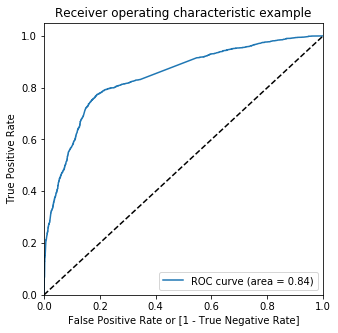

In [143]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

In [144]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead_Id,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.585030,6676,1,1,1,1,1,1,1,0,0,0,0
1,1,0.453954,6138,0,1,1,1,1,1,0,0,0,0,0
2,1,0.936703,8650,1,1,1,1,1,1,1,1,1,1,1
3,0,0.194242,3423,0,1,1,0,0,0,0,0,0,0,0
4,0,0.194242,6552,0,1,1,0,0,0,0,0,0,0,0


In [145]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.380243  1.000000  0.000000
0.1   0.1  0.440922  0.993263  0.102041
0.2   0.2  0.732149  0.827789  0.673469
0.3   0.3  0.794749  0.774737  0.807027
0.4   0.4  0.800993  0.724632  0.847843
0.5   0.5  0.787384  0.637053  0.879618
0.6   0.6  0.774736  0.548632  0.913459
0.7   0.7  0.753122  0.435789  0.947817
0.8   0.8  0.727185  0.328421  0.971842
0.9   0.9  0.700929  0.230737  0.989408


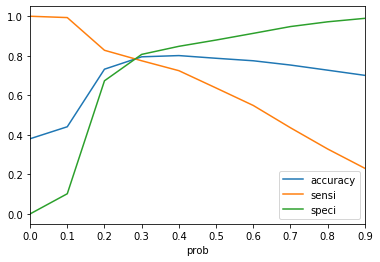

In [146]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [147]:
# Let us make the final prediction using 0.30 as the cut off

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.30 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead_Id,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.585030,6676,1,1,1,1,1,1,1,0,0,0,0,1
1,1,0.453954,6138,0,1,1,1,1,1,0,0,0,0,0,1
2,1,0.936703,8650,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0.194242,3423,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.194242,6552,0,1,1,0,0,0,0,0,0,0,0,0


In [148]:
# Now let us calculate the lead score

y_train_pred_final['lead_score'] = y_train_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_train_pred_final.head(20)

,Converted,Converted_Prob,Lead_Id,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,lead_score
0,1,0.585030,6676,1,1,1,1,1,1,1,0,0,0,0,1,59
1,1,0.453954,6138,0,1,1,1,1,1,0,0,0,0,0,1,45
2,1,0.936703,8650,1,1,1,1,1,1,1,1,1,1,1,1,94
3,0,0.194242,3423,0,1,1,0,0,0,0,0,0,0,0,0,19
4,0,0.194242,6552,0,1,1,0,0,0,0,0,0,0,0,0,19
5,1,0.121522,1696,0,1,1,0,0,0,0,0,0,0,0,0,12
6,1,0.735872,2110,1,1,1,1,1,1,1,1,1,0,0,1,74
7,0,0.056499,6830,0,1,0,0,0,0,0,0,0,0,0,0,6
8,0,0.470502,2581,0,1,1,1,1,1,0,0,0,0,0,1,47
9,0,0.155117,5927,0,1,1,0,0,0,0,0,0,0,0,0,16


In [149]:
# get the total of final predicted conversion / non conversion counts from the actual converted rates

checking_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_predicted']]
checking_df['final_predicted'].value_counts()

1    1840
0     535
Name: final_predicted, dtype: int64

In [150]:
# check the percentage of final_predicted conversions

1840/float(1840+535)

0.7747368421052632

In [151]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7947486391290426

In [152]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3124,  747],
       [ 535, 1840]], dtype=int64)

In [153]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [154]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.7747368421052632

In [155]:
# Let us calculate specificity

TN / float(TN+FP)

0.8070266081115991

In [156]:
# Calculate false postive rate - predicting conversions when leads has not converted

print(FP/ float(TN+FP))

0.19297339188840093


In [157]:
# Positive predictive value 

print (TP / float(TP+FP))

0.7112485504445304


In [158]:
# Negative predictive value

print (TN / float(TN+ FN))

0.8537851872096202


In [159]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3405,  466],
       [ 862, 1513]], dtype=int64)

In [160]:
from sklearn.metrics import precision_score, recall_score

In [161]:
# precision

precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7645275391611925

In [162]:
# recall

recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.6370526315789473

In [163]:
#Precision and recall tradeoff
from sklearn.metrics import precision_recall_curve

In [164]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       1
 1       1
 2       1
 3       0
 4       0
        ..
 6241    1
 6242    1
 6243    0
 6244    0
 6245    0
 Name: Converted, Length: 6246, dtype: int64, 0       1
 1       0
 2       1
 3       0
 4       0
        ..
 6241    0
 6242    1
 6243    0
 6244    1
 6245    0
 Name: predicted, Length: 6246, dtype: int64)

In [165]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

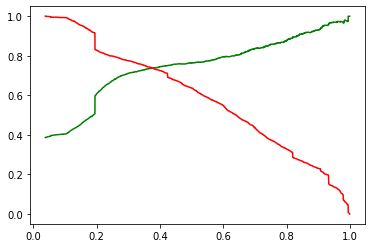

In [166]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# Making Predictions on the Test Dataset

In [167]:
#Performing Scaling
X_test[['TotalVisits','Page Views Per Visit','Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits','Page Views Per Visit','Total Time Spent on Website']])

In [168]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Welingak Website,What is your current occupation_Working Professional,Specialization_Not Mentioned
7625,0,2.077703,1,0,0,0,0,0,0,0,0
5207,0,0.739164,1,0,0,0,0,0,0,0,0
2390,0,-0.878390,0,0,0,0,0,0,0,0,1
4362,0,-0.455310,1,0,1,0,0,0,0,0,0
1023,0,-0.300302,1,0,0,0,0,0,0,0,0


In [169]:
X_test.shape

(2678, 11)

In [170]:
X_test_sm = sm.add_constant(X_test)
X_test_sm.shape

(2678, 12)

In [171]:
y_test_pred = res.predict(X_test_sm)

In [172]:
y_test_pred[:10]

7625    0.748872
5207    0.406695
2390    0.076563
4362    0.205136
1023    0.179551
8226    0.823347
3079    0.246357
530     0.191659
7873    0.194242
5146    0.506743
dtype: float64

In [173]:
# Converting y_pred to a dataframe 

y_pred_1 = pd.DataFrame(y_test_pred)

In [174]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [175]:
# Putting Lead_Id to index

y_test_df['Lead_Id'] = y_test_df.index

In [176]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [177]:
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [178]:
y_pred_final.head()

,Converted,Lead_Id,0
0,0,7625,0.748872
1,1,5207,0.406695
2,1,2390,0.076563
3,0,4362,0.205136
4,0,1023,0.179551


In [179]:
# Renaming the column 

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [180]:
# Based on cut off threshold using accuracy, sensitivity and specificity of 0.31%

y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.31 else 0)

In [181]:
y_pred_final.head()

,Converted,Lead_Id,Converted_Prob,final_predicted
0,0,7625,0.748872,1
1,1,5207,0.406695,1
2,1,2390,0.076563,0
3,0,4362,0.205136,0
4,0,1023,0.179551,0


In [182]:
# Now let us calculate the lead score

y_pred_final['lead_score'] = y_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_pred_final.head(20)

,Converted,Lead_Id,Converted_Prob,final_predicted,lead_score
0,0,7625,0.748872,1,75
1,1,5207,0.406695,1,41
2,1,2390,0.076563,0,8
3,0,4362,0.205136,0,21
4,0,1023,0.179551,0,18
5,1,8226,0.823347,1,82
6,0,3079,0.246357,0,25
7,0,530,0.191659,0,19
8,0,7873,0.194242,0,19
9,1,5146,0.506743,1,51


In [183]:
# get the total of final predicted conversion or non conversion counts from the actual converted rates

checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_predicted']]
checking_test_df['final_predicted'].value_counts()

1    772
0    222
Name: final_predicted, dtype: int64

In [184]:
# check the Percentage of final_predicted conversions on test data

772/float(772+222)

0.7766599597585513

In [185]:
# Let's check the accuracy.

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7957430918595967

In [186]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1359,  325],
       [ 222,  772]], dtype=int64)

In [187]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [188]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7766599597585513

In [189]:
# Let us calculate specificity
TN / float(TN+FP)

0.8070071258907363

In [190]:
# precision
print('precision ',precision_score(y_pred_final.Converted, y_pred_final.final_predicted))

# recall
print('recall ',recall_score(y_pred_final.Converted, y_pred_final.final_predicted))

precision  0.7037374658158614
recall  0.7766599597585513


# Conclusinon

We have successfully analysed the leads dataset provided and calculated Accurracy, Sensitivity, Specificity of both train and test datasets

Train Dataset

     Specificity=80.70
     
     Sensitivity=77.47%
     
     Accuracy Score=79.47
     
      Percentage of final_predicted conversions on train data = 77.47%
     
Test Dataset

     Specificity=80.7%
     
     Sensitivity=77.66%
     
     Accuracy Score=79.57%
      
     Percentage of final_predicted conversions on test data = 77.66%
 
 
 Precision Score = 70.37
 
 Recall Score = 77.66

 
 
 